In [30]:
import matplotlib.pyplot as plt
import serial  # To read data from serial port
import numpy as np



# Function to read capture_buf data from the serial port
def read_capture_buf():
    global capture_buf
    capture_buf = []
    while True:
        line = ser.readline().decode('utf-8').strip()
        # print(line)
        if line == "Capture finished":
            print("start record")
            break
    while True:
        line = ser.readline().decode('utf-8').strip()
        if line == "Capture finished":
            print("end record")
            break
        try:
            values = line.split(",")  # Splitting values by commas
            capture_buf += [int(val) for val in values if val.strip()]
        except ValueError:
            pass
        
    

# Plotting function
def plot_spectrum():
    global capture_buf
    if not capture_buf:
        print("No data to plot.")
        return

    # Create the x-axis (index) for plotting
    x_axis = np.arange(len(capture_buf))
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, capture_buf, label='ADC Values')
    plt.xlabel('Sample Number')
    plt.ylabel('ADC Value')
    plt.title('Captured Spectrum')
    plt.grid(True)
    plt.legend()
    plt.show()

# # Main code to read and plot the spectrum
# try:
#     while True:
#         # Reading capture buffer from serial
#         print("Reading capture buffer data...")
#         read_capture_buf()

#         # Plotting the captured buffer
#         if capture_buf:
#             print(f"Captured {len(capture_buf)} samples.")
#             plot_spectrum()

#         # Wait before the next read (for simulation purposes)
#         input("Press Enter to capture the next spectrum...")
        
# except KeyboardInterrupt:
#     print("Exiting program...")
# finally:
#     ser.close()


In [29]:
ser.close()

start record
end record
3694


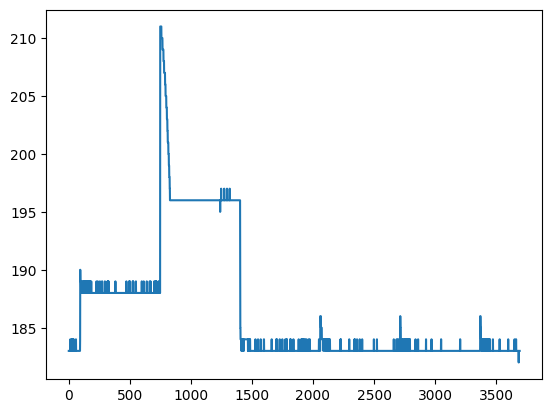

In [34]:
# Assuming capture depth is known
CAPTURE_DEPTH = 3694  # Or use the value from your C code
capture_buf = []

# Reading data from serial (replace with your COM port and baudrate)
ser = serial.Serial('COM23', 115200, timeout=1)
# line = ser.readline().decode('utf-8').strip()
read_capture_buf()
ser.close()
print(len(capture_buf))
plt.plot(capture_buf)